### This is a study on data collected during each batch of XRF runs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [233]:
df = pd.read_excel('data/crm.xlsx', parse_dates=['DT'])
df.columns =["sample","ni","fe","co","alu","sil","phos","sul","mag","cal","chrom","man","ti","dt","xrf"]
df = df.set_index('dt')

In [241]:
df['year'] = df.index.year
df['hour'] = df.index.hour
df['date'] = df.index.date
df['day_name'] = df.index.strftime('%A').str[:3]
df['month_year'] = df.index.to_period('M')

In [242]:
df.head()

,sample,ni,fe,co,alu,sil,phos,sul,mag,cal,chrom,man,ti,xrf,year,hour,date,day_name,month_year
dt,,,,,,,,,,,,,,,,,,,
2021-06-06 03:50:24.000,S1,0.6344,48.71,0.0981,10.25,2.032,< 0.0012,0.1668,0.741,NaN,NaN,NaN,NaN,3,2021,3,2021-06-06,Sun,2021-06
2021-06-06 09:21:36.000,S1,0.6342,49.41,0.1048,10.47,2.159,< 0.0012,0.1652,0.854,NaN,NaN,NaN,NaN,3,2021,9,2021-06-06,Sun,2021-06
2021-06-06 14:09:36.000,S1,0.6303,48.10,0.107,10.17,1.811,0.00949,0.1613,1.001,NaN,NaN,NaN,NaN,2,2021,14,2021-06-06,Sun,2021-06
2021-06-06 16:17:36.960,S1,0.6191,48.43,0.12,10.19,1.816,0.00955,0.1634,1.056,NaN,NaN,NaN,NaN,2,2021,16,2021-06-06,Sun,2021-06
2021-06-06 16:19:12.000,S1,0.6384,48.03,0.112,10.46,1.667,0.00754,0.1667,0.923,NaN,NaN,NaN,NaN,2,2021,16,2021-06-06,Sun,2021-06


In [286]:
elements = ['ni','fe', 'alu']
crm = df.groupby(['xrf','sample'])[elements].resample('D').mean().dropna(how='all').round(2).reset_index().set_index('dt').sort_index()
crm.to_csv("data/daily_crm.csv")
crm.head()

,xrf,sample,ni,fe,alu
dt,,,,,
2021-06-06,2,S1,0.63,48.21,10.35
2021-06-06,3,S2,0.69,52.17,7.38
2021-06-06,3,S1,0.64,49.09,10.77
2021-06-06,2,S2,0.66,50.95,6.88
2021-06-30,2,S1,0.64,48.96,10.66


In [40]:
#subset and make a csv file for use in the 2023 QC Program
crm22 = crm[crm.year==2022].drop('year',axis=1)
crm22.to_csv('data/crm2022.csv')

# 2022 CRM SUMMARY

In [44]:
crm_22_summary = crm22.groupby(['sample','xrf'])['ni','fe', 'alu'].agg(['count', 'max','min', np.mean,np.median, np.std]).round(2).reset_index()
crm_22_summary.to_csv('data/summary_crm22.csv')

/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_4912/2398525334.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crm_22_summary = crm22.groupby(['sample','xrf'])['ni','fe', 'alu'].agg(['count', 'max','min', np.mean,np.median, np.std]).round(2).reset_index()


In [247]:
#full data for 2022
df22 = df[df['year']==2022]
df22_new = df22.groupby(['hour','date'])['ni'].nunique()
df22_new = df22_new.reset_index(name='count')
df22_new.loc[df22_new['count']>18,'count'] = 18

## CRM Usage over Months

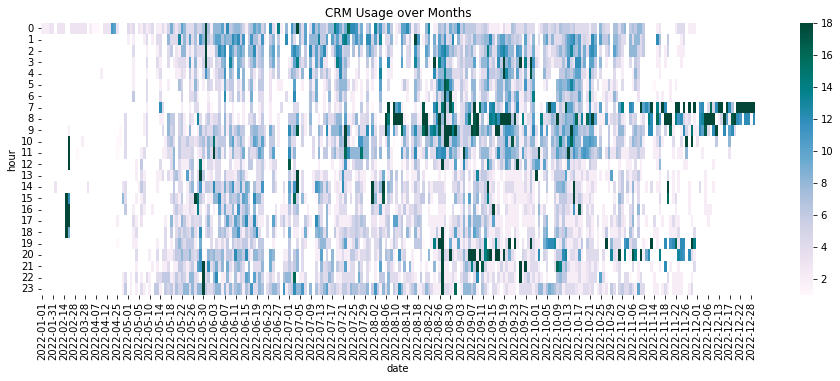

In [160]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_new.pivot('hour','date','count'),annot=False, cmap="PuBuGn")
plt.title('CRM Usage over Months');

## CRM Usage over Months reduced

In [172]:
df22_new = df22.groupby(['hour','date'])['ni'].nunique()
df22_new = df22_new.reset_index(name='count')
df22_new.loc[df22_new['count']>9,'count'] = 0 #exclude most instances of run requests using crm only

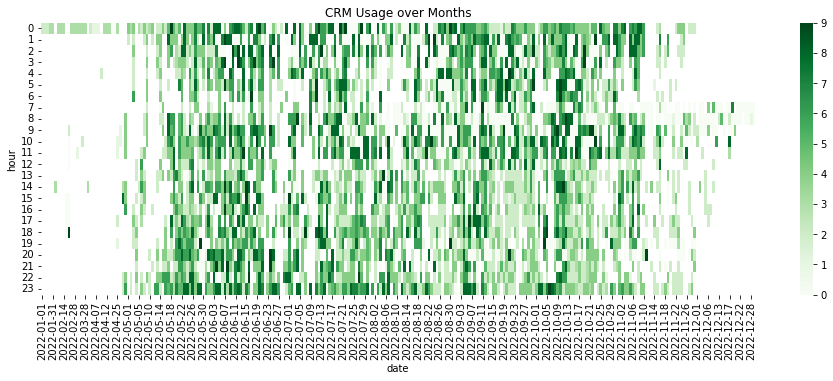

In [173]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_new.pivot('hour','date','count'),annot=False, cmap="Greens")
plt.title('CRM Usage over Months');

## XRF Usage over Months

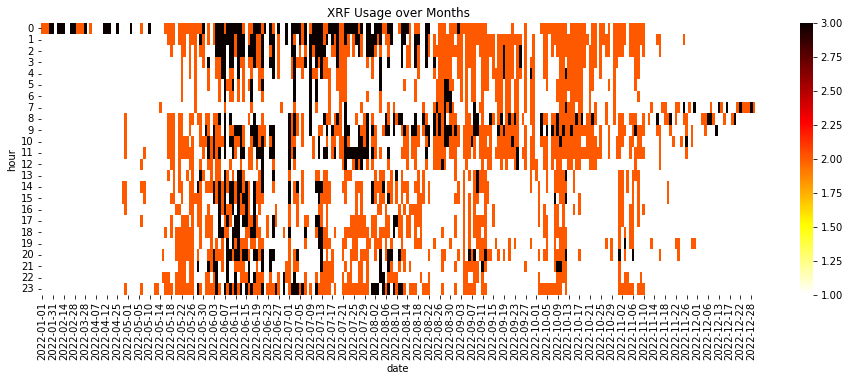

In [225]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_xrf.pivot('hour','date','count'), cmap='hot_r')
plt.title('XRF Usage over Months');

## XRF Usage per Week by Hour

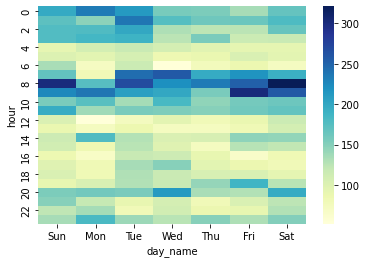

In [254]:
days_arr = ["Sun","Mon","Tue", "Wed", "Thu", "Fri", "Sat"]
df_heat = df22.groupby(['hour', 'day_name'])['xrf'].size().reset_index()
df_heat2 = df_heat.pivot('hour', 'day_name','xrf')
sns.heatmap(df_heat2[days_arr], cmap='YlGnBu');

## Runs by Hour

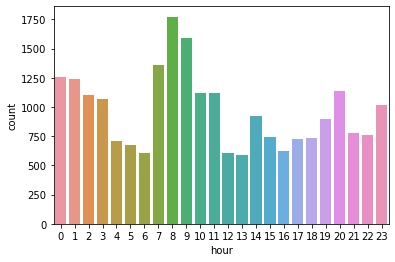

In [263]:
sns.countplot(x='hour', data=df22);

## Runs per Day

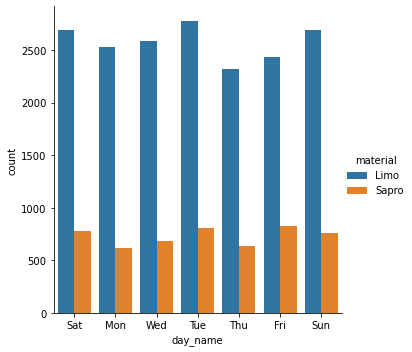

In [348]:
def material(x):
    if x > 40:
        return "Limo"
    return "Sapro"
df22['material'] = df22['fe'].apply(material)
sns.catplot(x='day_name', hue='material',data=df22, kind='count');

## Monthly CRM Runs

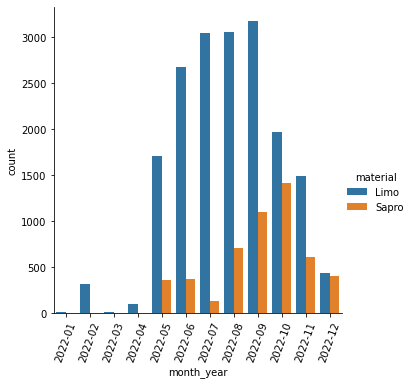

In [281]:
df22.sort_values(by=['month_year'], inplace=True)
sns.catplot(x='month_year', hue='material', data= df22, kind='count')
plt.xticks(rotation=70);

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

daily = pd.read_csv("data/daily_crm.csv", parse_dates=['dt'])
daily22 = daily.loc[daily.dt>'2021-12-31']

In [283]:
xrfs = daily.xrf.unique().tolist()
samples = daily['sample'].unique().tolist()

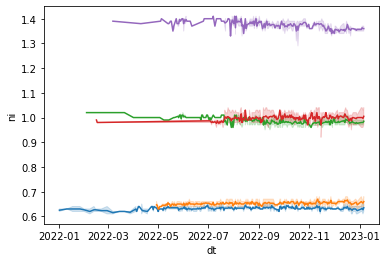

In [294]:
for i in samples:
    i = daily22[daily22['sample']== i]
    sns.lineplot(x=i['dt'],y=i['ni']);

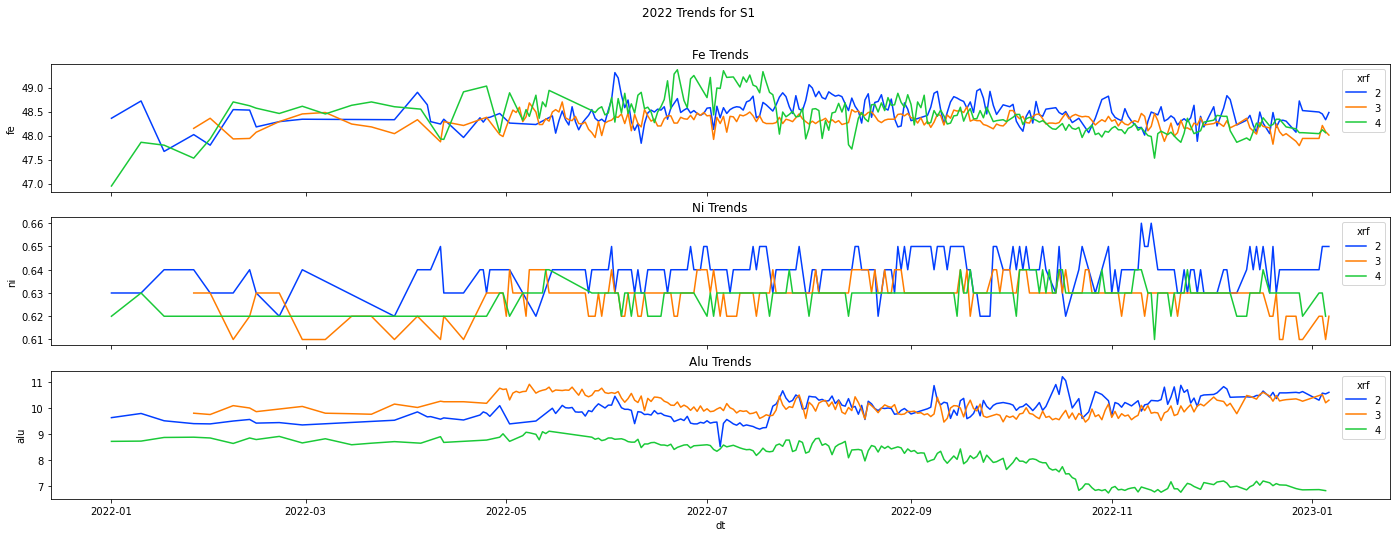

In [321]:
s1 =daily22[daily22['sample']== 'S1']
fig, axes = plt.subplots(3,1, figsize=(24, 8), sharex=True)

fig.suptitle('2022 Trends for S1')
sns.lineplot(ax=axes[0],x=s1.dt, y=s1.fe, hue=s1.xrf, palette='bright',lw=1.5,ls='-')
axes[0].set_title("Fe Trends")
sns.lineplot(ax=axes[1],x=s1.dt, y=s1.ni, hue=s1.xrf, palette='bright',lw=1.5,ls='-')
axes[1].set_title("Ni Trends")
sns.lineplot(ax=axes[2], x=s1.dt,y=s1.alu, hue=s1.xrf, palette='bright',lw=1.5,ls='-')
axes[2].set_title("Alu Trends");

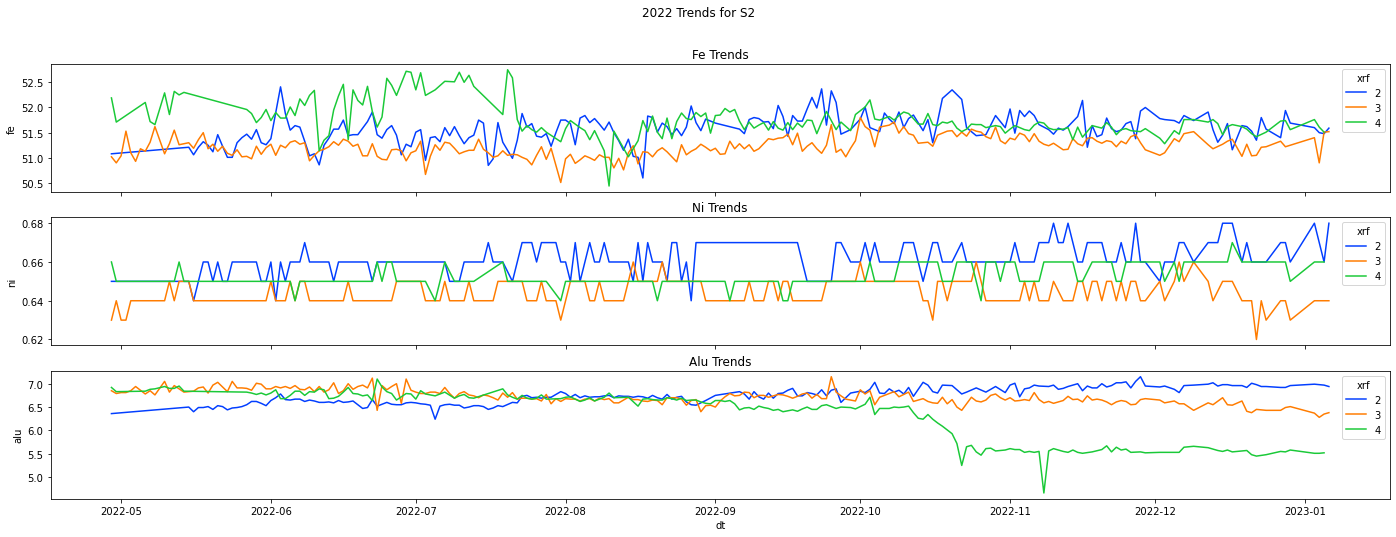

In [322]:
s2 =daily22[daily22['sample']== 'S2']
fig, axes = plt.subplots(3,1, figsize=(24, 8), sharex=True)

fig.suptitle('2022 Trends for S2')
sns.lineplot(ax=axes[0],x=s2.dt, y=s2.fe, hue=s2.xrf, palette='bright',lw=1.5,ls='-')
axes[0].set_title("Fe Trends")
sns.lineplot(ax=axes[1],x=s2.dt, y=s2.ni, hue=s2.xrf, palette='bright',lw=1.5,ls='-')
axes[1].set_title("Ni Trends")
sns.lineplot(ax=axes[2], x=s2.dt,y=s2.alu, hue=s2.xrf, palette='bright',lw=1.5,ls='-')
axes[2].set_title("Alu Trends");

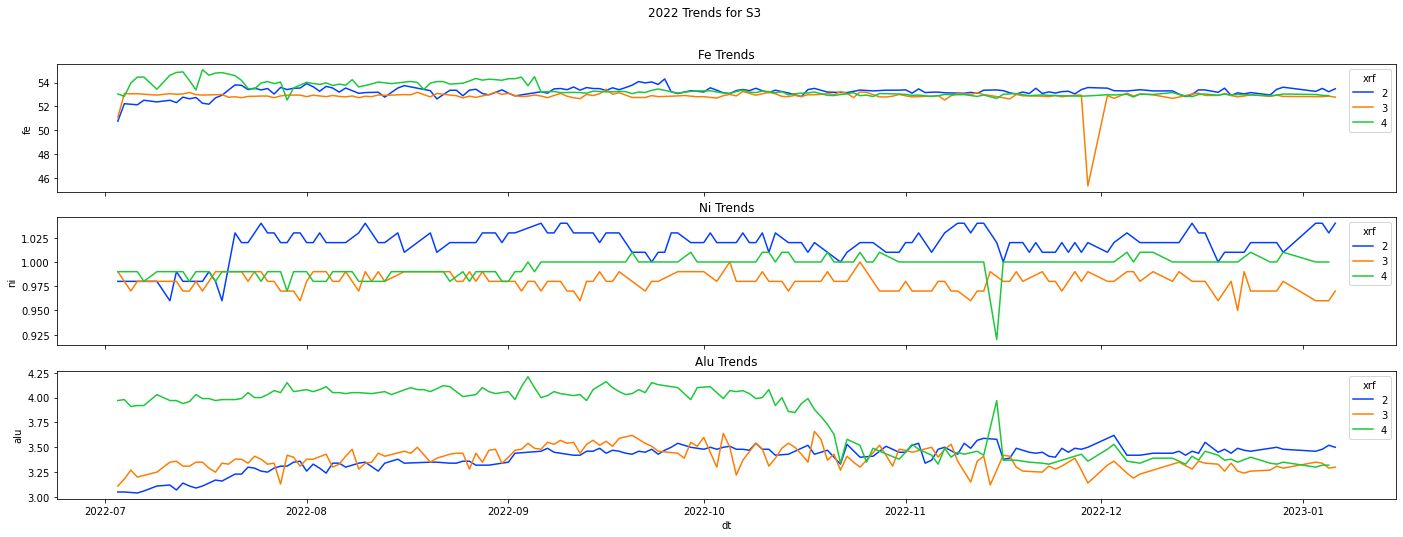

In [330]:
s3 =daily22[(daily22['sample']== 'S3') & (daily22['dt'] >'2022-07-01')]
fig, axes = plt.subplots(3,1, figsize=(24, 8), sharex=True)

fig.suptitle('2022 Trends for S3')
sns.lineplot(ax=axes[0],x=s3.dt, y=s3.fe, hue=s3.xrf, palette='bright',lw=1.5,ls='-')
axes[0].set_title("Fe Trends")
sns.lineplot(ax=axes[1],x=s3.dt, y=s3.ni, hue=s3.xrf, palette='bright',lw=1.5,ls='-')
axes[1].set_title("Ni Trends")
sns.lineplot(ax=axes[2], x=s3.dt,y=s3.alu, hue=s3.xrf, palette='bright',lw=1.5,ls='-')
axes[2].set_title("Alu Trends");

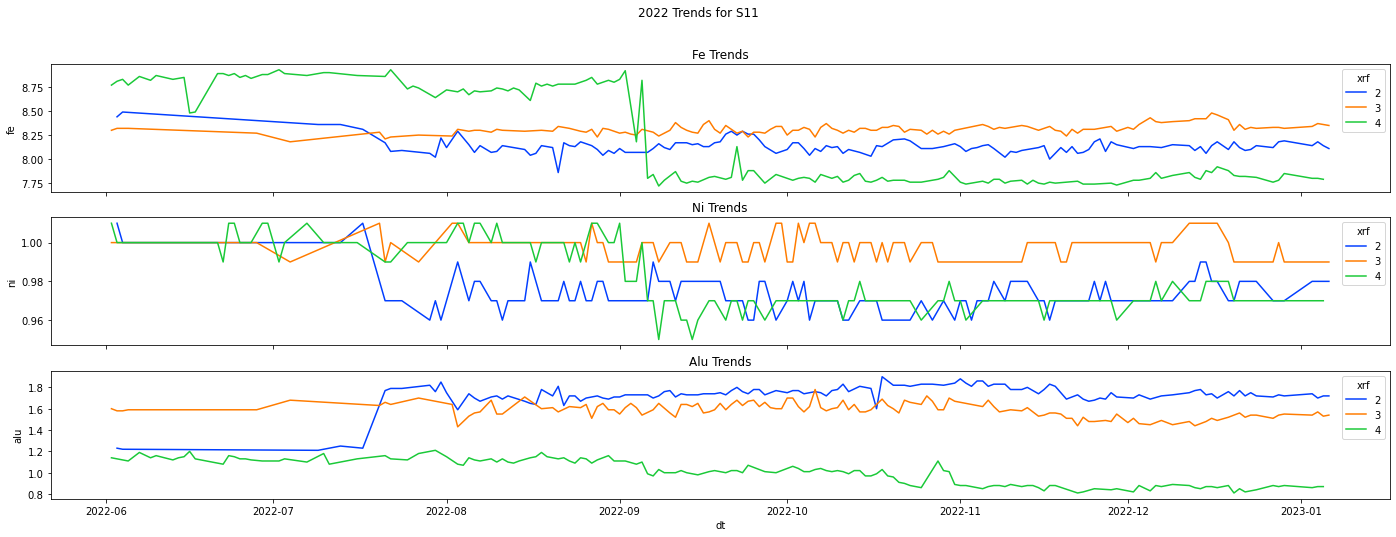

In [334]:
s11 =daily22[(daily22['sample']== 'S11') & (daily22['dt'] >'2022-06-01')]
fig, axes = plt.subplots(3,1, figsize=(24, 8), sharex=True)

fig.suptitle('2022 Trends for S11')
sns.lineplot(ax=axes[0],x=s11.dt, y=s11.fe, hue=s11.xrf, palette='bright',lw=1.5,ls='-')
axes[0].set_title("Fe Trends")
sns.lineplot(ax=axes[1],x=s11.dt, y=s11.ni, hue=s11.xrf, palette='bright',lw=1.5,ls='-')
axes[1].set_title("Ni Trends")
sns.lineplot(ax=axes[2], x=s11.dt,y=s11.alu, hue=s11.xrf, palette='bright',lw=1.5,ls='-')
axes[2].set_title("Alu Trends");

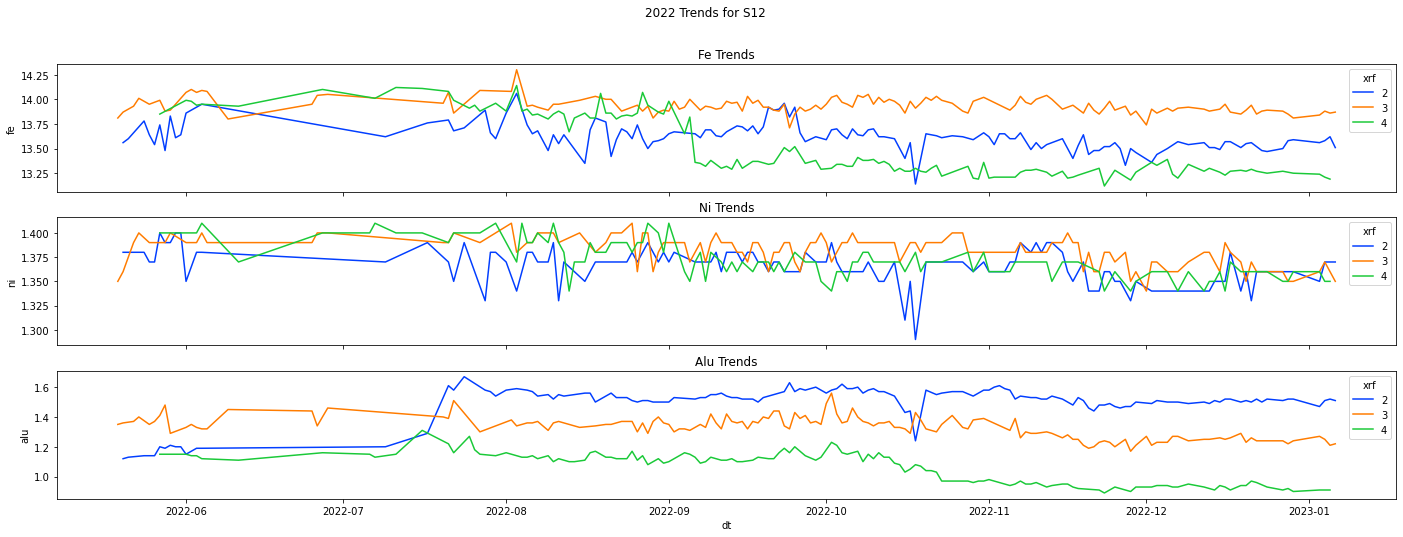

In [337]:
s12 = daily22[(daily22['sample']== 'S12') & (daily22['dt'] >'2022-05-17')]
fig, axes = plt.subplots(3,1, figsize=(24, 8), sharex=True)

fig.suptitle('2022 Trends for S12')
sns.lineplot(ax=axes[0],x=s12.dt, y=s12.fe, hue=s12.xrf, palette='bright',lw=1.5,ls='-')
axes[0].set_title("Fe Trends")
sns.lineplot(ax=axes[1],x=s12.dt, y=s12.ni, hue=s12.xrf, palette='bright',lw=1.5,ls='-')
axes[1].set_title("Ni Trends")
sns.lineplot(ax=axes[2], x=s12.dt,y=s12.alu, hue=s12.xrf, palette='bright',lw=1.5,ls='-')
axes[2].set_title("Alu Trends");

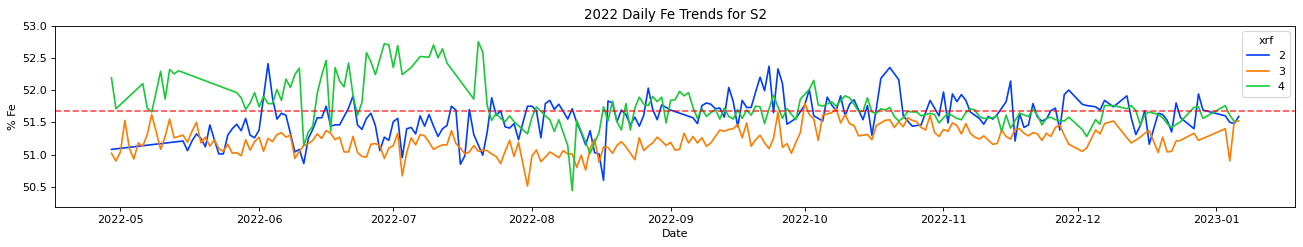

In [301]:
s2 =daily22[daily22['sample']== 'S2']

plt.figure(figsize=(20, 3), dpi=80)
ax = sns.lineplot(data=s2 ,x='dt', y='fe', hue='xrf', palette='bright',lw=1.5,ls='-')

# Highlight true value
ax.axhline(51.68, color='r', alpha=0.7, label='true value',ls='--')

# Highlight median
#ax.axhline(s2['fe'].median(), color='black', label = "median Fe", alpha=0.4)
ax.set_ylim(s2['fe'].min()-0.25,s2['fe'].max()+0.25)

plt.title("2022 Daily Fe Trends for S2")
plt.xlabel("Date")
plt.ylabel("% Fe")

plt.show()

In [340]:
df.head()

,sample,ni,fe,co,alu,sil,phos,sul,mag,cal,chrom,man,ti,xrf,year,hour,date,day_name,month_year
dt,,,,,,,,,,,,,,,,,,,
2021-06-06 03:50:24.000,S1,0.6344,48.71,0.0981,10.250,2.032,< 0.0012,0.1668,0.741,NaN,NaN,NaN,NaN,3,2021,3,2021-06-06,Sun,2021-06
2021-06-06 20:49:46.560,S2,0.6863,52.17,0.146,7.378,2.13,< 0.0012,0.1493,0.745,NaN,NaN,NaN,NaN,3,2021,20,2021-06-06,Sun,2021-06
2021-06-06 09:21:36.000,S1,0.6342,49.41,0.1048,10.470,2.159,< 0.0012,0.1652,0.854,NaN,NaN,NaN,NaN,3,2021,9,2021-06-06,Sun,2021-06
2021-06-06 14:09:36.000,S1,0.6303,48.10,0.107,10.170,1.811,0.00949,0.1613,1.001,NaN,NaN,NaN,NaN,2,2021,14,2021-06-06,Sun,2021-06
2021-06-06 16:17:36.960,S1,0.6191,48.43,0.12,10.190,1.816,0.00955,0.1634,1.056,NaN,NaN,NaN,NaN,2,2021,16,2021-06-06,Sun,2021-06


In [357]:
df['material'] = df['fe'].apply(material)
df_cat = df[(df['year']== 2022)].groupby(['xrf','sample',"hour",'day_name','material','month_year']).size().reset_index()

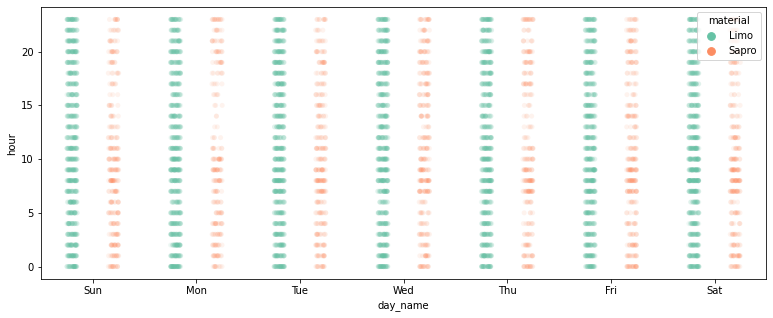

In [376]:
plt.figure(figsize=(13,5))
sns.stripplot(x='day_name', y='hour', hue='material',data=df_cat,jitter=True,dodge=True, palette='Set2', alpha=0.1, order=days_arr);

In [7]:

crm = df.groupby(['xrf','sample'])[elements].resample('D').mean().dropna(how='all').round(2).reset_index().set_index('dt').sort_index()
crm.to_csv("data/daily_crm.csv")
crm.head()

NameError: name 'elements' is not defined

In [9]:
df = pd.read_csv('/Users/ecuerbo/Desktop/data/cleaned_daily.csv')
elements = ['Ni', 'Fe', 'Al2O3']
crm = df.groupby(['XRF','Sample'])[elements].resample('D').mean().dropna(how='all').round(2).reset_index().set_index('DT').sort_index()
crm.to_csv("/Users/ecuerbo/Desktop/data/daily_crm.csv")
crm.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'